In [68]:
import numpy as np
import pandas as pd

file = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseSTRICT.csv")
file2 = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseFREE.csv")
# file2_old = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseFREE_OLD.csv")
# file2 = pd.read_csv("/Users/jdv/Desktop/ui_test_1E_wseFREE_OLD.csv")
y1 = np.array(file["ok"].values)
y2 = np.array(file2["ok"].values)


X1 = [file["n_samples"].values, file["ellipse_area"].values, file["ellipse_wse"].values]
X2 = [file2["n_samples"].values, file2["ellipse_area"].values, file2["ellipse_wse"].values]

X = []
for i in range(len(X1)):
    X.append(np.append(X1[i], X2[i]))
X[0] = X[0]/1000
X[1] = X[1]/np.max(X[1])
# X[2] = X[2]/np.max(X[2])


X = np.rot90(X)
y = np.append(y1,y2)


In [69]:
from sklearn.svm import SVC
from sklearn import svm, datasets

model = svm.SVC(kernel="linear", C=0.30) #0.25
clf = model.fit(np.copy(X),np.copy(y))

In [70]:
x_t_0 = X[y==True, 0]
x_t_1 = X[y==True, 1]
x_t_2 = X[y==True, 2]

x_f_0 = X[y==False, 0]
x_f_1 = X[y==False, 1]
x_f_2 = X[y==False, 2]

xm, xM = X[:,0].min(), X[:, 0].max()
ym, yM = X[:,1].min(), X[:, 1].max()

<IPython.core.display.Javascript object>


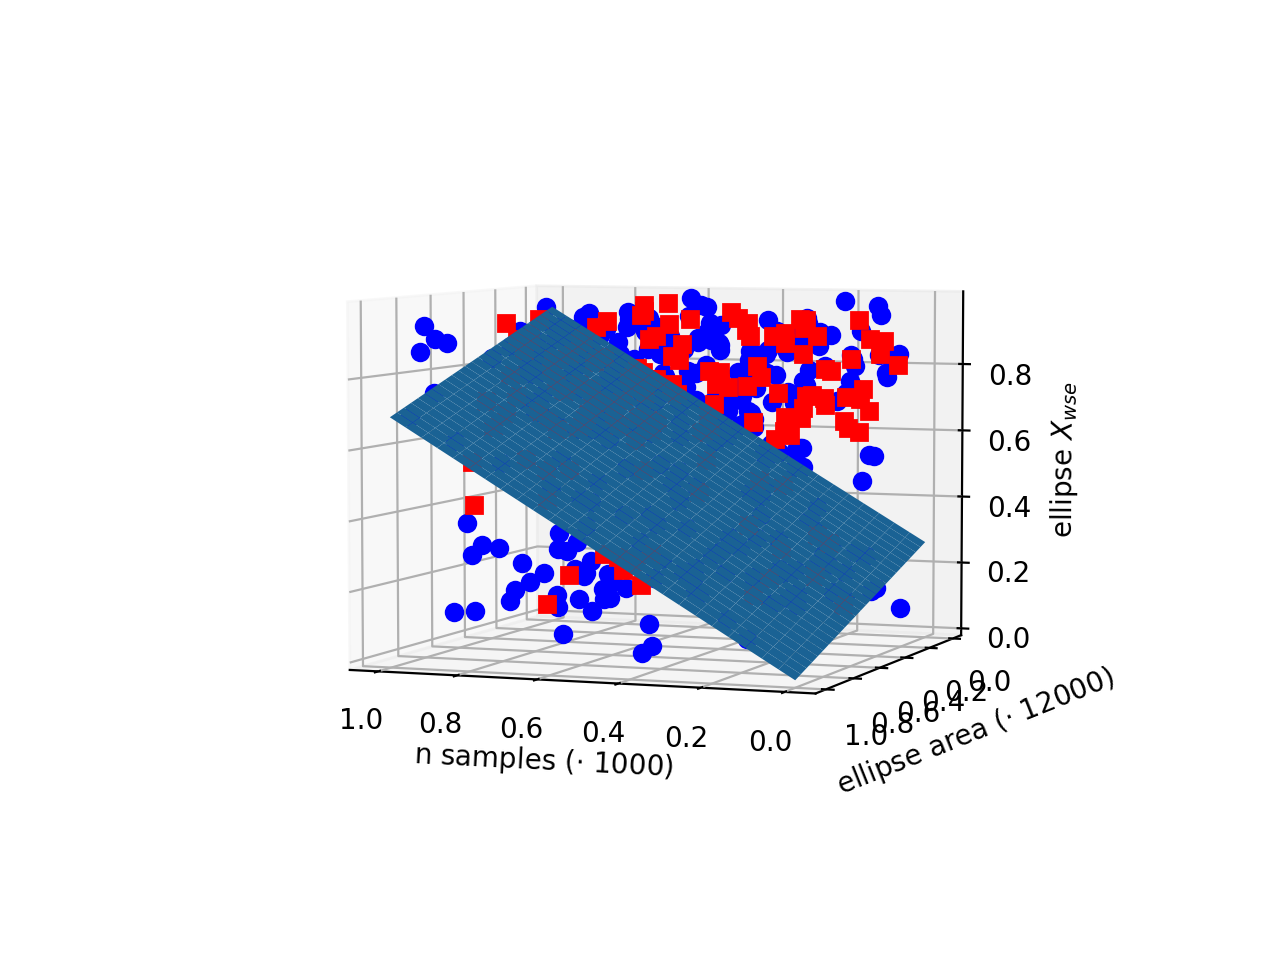

In [80]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(0,1,51)
x,y = np.meshgrid(tmp,tmp)
T = z(x,y)
T = T/np.max(T)
T = T - 1
T = T*10000


fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(x_t_0, x_t_1, x_t_2, 'ob')
ax.plot3D(x_f_0, x_f_1, x_f_2, 'sr')
ax.plot_surface(x, y, T, alpha=1)
ax.view_init(30, 60)

ax.set_xlabel('n samples ($\cdot$ 1000)', fontsize=10)
ax.set_ylabel('ellipse area ($\cdot$ 12000)', fontsize=10)
ax.set_zlabel('ellipse $X_{wse}$', fontsize=10)
fig.savefig('./classifier_plots/3dplane_eWse_eArea_nSamples.pdf', dpi=120)
plt.show()